Dataset From Kaggle 
https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data/data
House price data

- Area_type - Description of the area
- Availability - When it can be possessed or when it is ready
- Location - Where it is located in Bengaluru
- Size - BHK or Bedrooms
- Society - To which society it belongs
- Total_sqft - Size of the property in sq.ft
- Bath - No. of Bathrooms
- Balcony - No. of the Balcony
- Price - Value of the property in lakhs (Indian Rupee - ₹)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,5)

# Import machine learning libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score, classification_report

from scipy import stats

from fuzzywuzzy import fuzz, process

import joblib


C:\Users\Fahmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Loading and checking the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Exploratory Data Analysis (EDA)

### Exploring shape of the data

In [4]:
df.shape

(13320, 9)

### Dimensions

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Stats

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
area_type,13320,4,Super built-up Area,8790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability,13320,81,Ready To Move,10581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,13319,1305,Whitefield,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,13304,31,2 BHK,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
society,7818,2688,GrrvaGr,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_sqft,13320,2117,1200,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bath,13247.0,NaN,NaN,NaN,2.69261,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,NaN,NaN,NaN,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,NaN,NaN,NaN,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

### Visualizations

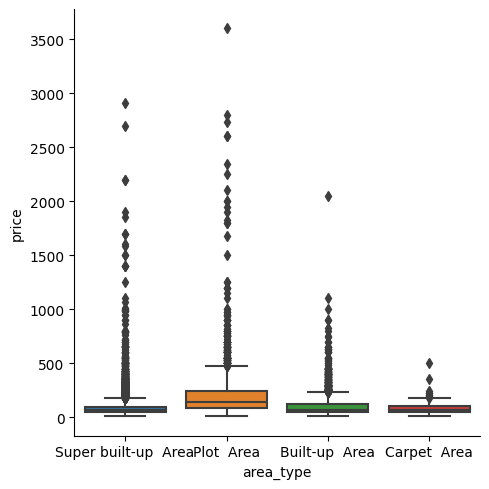

In [11]:
sns.catplot(data=df, x="area_type", y="price", kind="box")

The Prices tends to be high at Area Plot and leans to lower values in Carpet Area kind of buildings

C:\Users\Fahmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Fahmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Fahmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

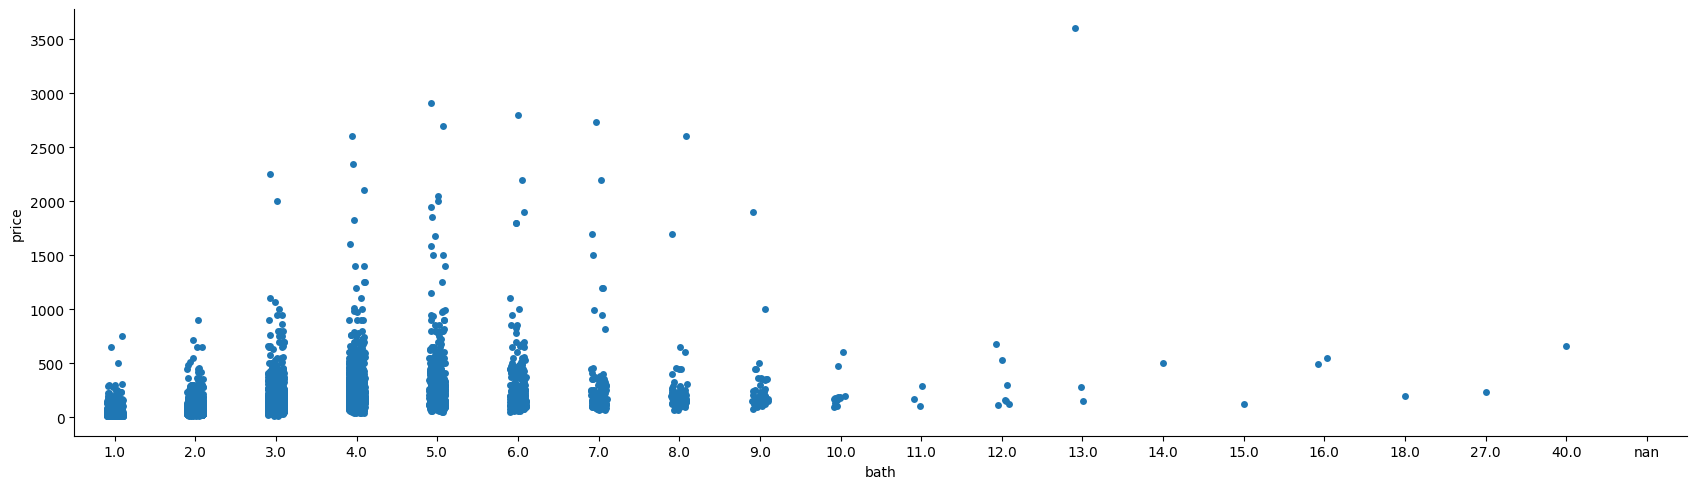

In [12]:
g = sns.catplot(data=df, x="bath", y="price")
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

Data is Normally distributed according to the number of baths per unit

<Axes: xlabel='bath'>

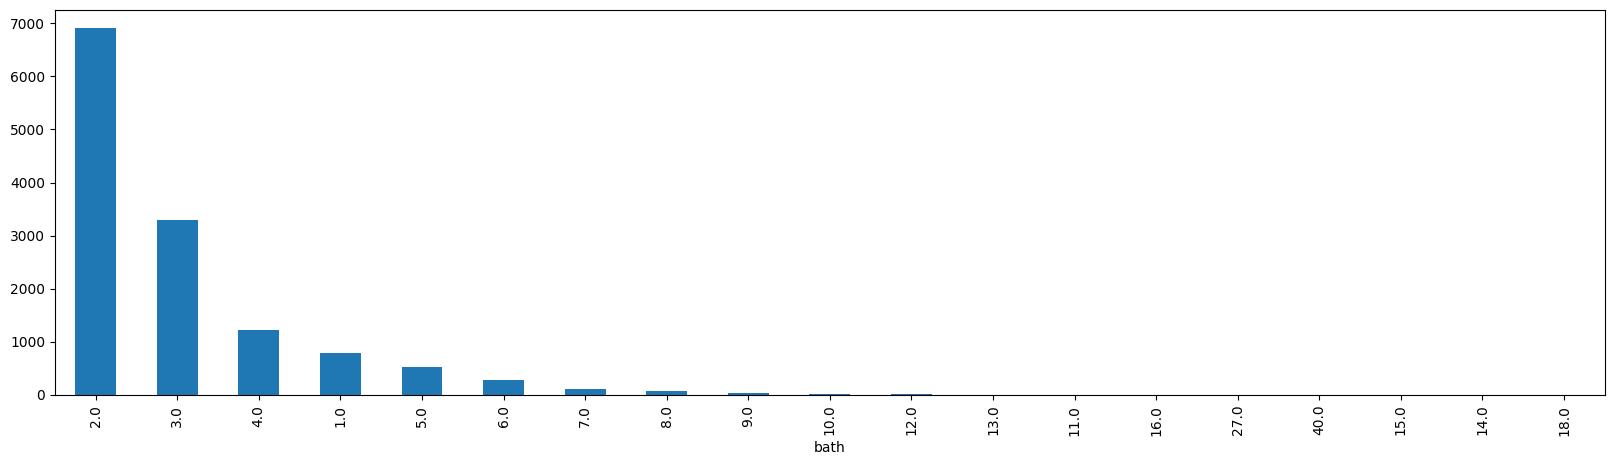

In [13]:
df.bath.value_counts().plot(kind='bar')

Although Most of the units tend to have between 2-4 bathrooms per units

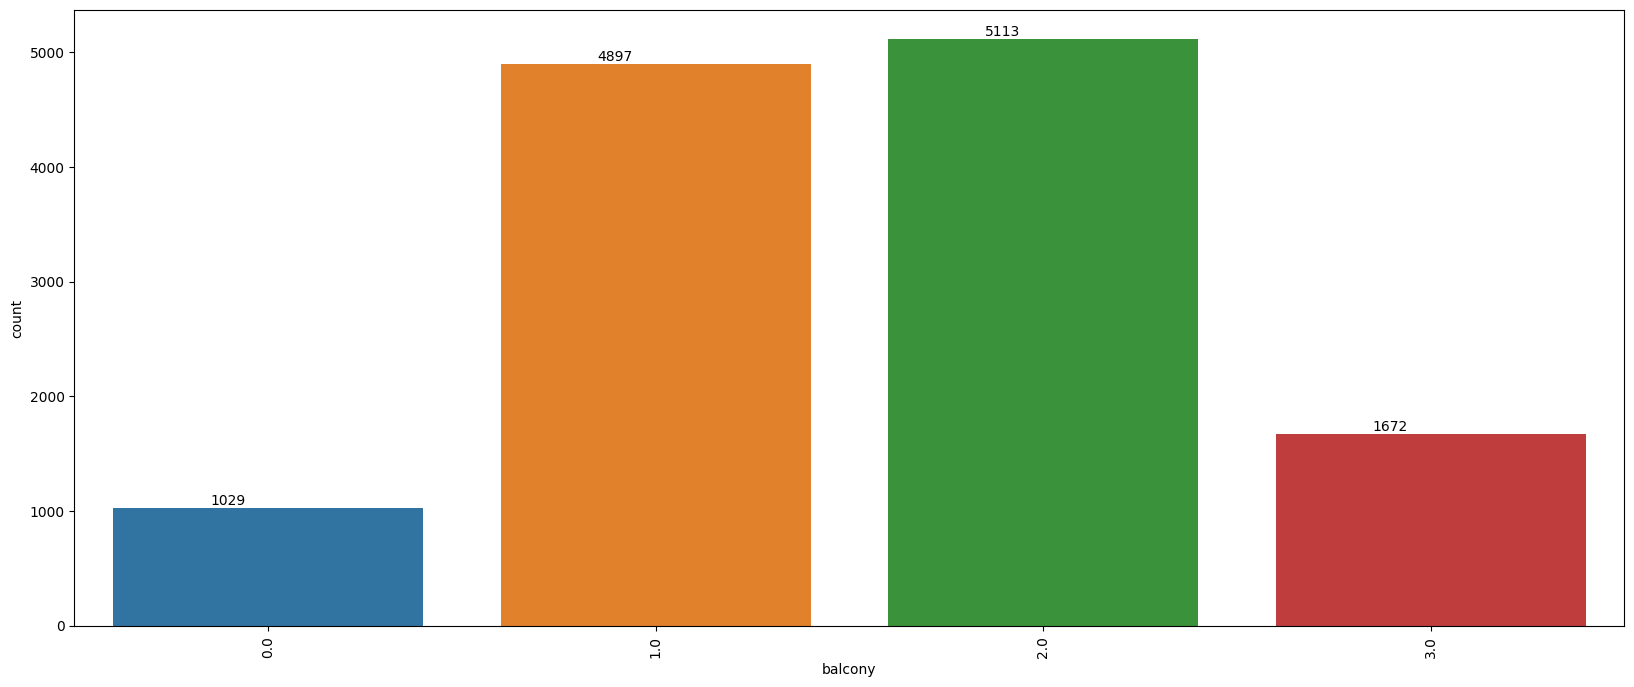

In [14]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

## Data Manipulation 

### 1. Dropping Irrelevant Columns

Based on domain knowledge, we decided to drop the society and area_type columns. 
<br><b>The Society column </b> is merely the name of the building and doesn't hold significant value. 
<br><b>The Area Type column </b>indicates whether the property is a plot, flat, or house, but this information doesn't significantly impact the property price. Instead, we will use the total square footage to derive meaningful insights.
<br>Also the Area Type can be considered as a <b>confound variable</b>: as It must be correlated with the independent variable. This may be a causal relationship, but it does not have to be.

In [15]:
df2 = df.drop(['society', 'area_type'], axis='columns')
df2.head()

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


### 2.Cleaning total_sqft Values

To ensure consistency in our dataset, we need to clean and standardize the total_sqft values, which are currently in various units and formats.
<p>Step 1: Standardizing total_sqft Values

In [16]:
# Exploring cases we have (floats, ranges and strings)

# Extract unique values
unique_values = df2['total_sqft'].unique()

# Categorize values
floats = []
ranges = []
strings = []
unknown = []

for value in unique_values:
    try:
        # Try to convert to float
        float_value = float(value)
        floats.append(value)
    except ValueError:
        # Check if it is a range
        if '-' in value and all(part.strip().replace('.', '', 1).isdigit() for part in value.split('-')):
            ranges.append(value)
        else:
            try:
                # Check if it's a valid range format (e.g., '1133 - 1384')
                start, end = value.split('-')
                float(start.strip())
                float(end.strip())
                ranges.append(value)
            except (ValueError, IndexError):
                # If it doesn't fit float or range, classify it as string or unknown
                if value.isalpha() or not any(char.isdigit() for char in value):
                    strings.append(value)
                else:
                    unknown.append(value)

# Display categorized results
print("Floats:")
print(floats)
print("\nRanges:")
print(ranges)
print("\nStrings:")
print(strings)
print("\nUnknown:")
print(unknown)

Floats:
['1056', '2600', '1440', '1521', '1200', '1170', '2732', '3300', '1310', '1020', '1800', '2785', '1000', '1100', '2250', '1175', '1180', '1540', '2770', '600', '1755', '2800', '1767', '510', '1250', '660', '1610', '1151', '1025', '1075', '1760', '1693', '1925', '700', '1070', '1724', '1290', '1143', '1296', '1254', '1330.74', '970', '1459', '800', '869', '1270', '1670', '2010', '1185', '1600', '1500', '1407', '840', '4395', '845', '5700', '1160', '3000', '1140', '1220', '1350', '1005', '500', '1358', '1569', '1240', '2089', '1206', '1150', '2511', '460', '4400', '1660', '1326', '1325', '1499', '1665', '708', '1060', '710', '1450', '2894', '1330', '2502', '650', '2400', '1007', '966', '1630', '1640', '782', '1260', '1413', '1116', '1530', '3700', '2497', '1436', '276', '1427', '2061', '2650', '1282', '1050', '945', '950', '1870', '880', '1535', '1360', '1280', '5000', '3050', '1563.05', '1167', '4000', '1828', '890', '1612', '1034', '1710', '957', '2795', '1125', '1735', '2050',

Step 2: Conversion Function for total_sqft
<P> We create a function to handle the conversion of total_sqft values. This function uses a dictionary to map different units to a single unit (square feet). It first checks each data point for a unit and converts it if necessary. For range values, it calculates the mean of the range. Finally, it converts all values into floats for clean data points.

In [17]:
def convert_sqft_to_num(x):
    # Dictionary mapping units to their conversion factors to square feet
    conversion_factors = {
        'Sq. Meter': 10.7639,
        'Sq. Yard': 9,
        'Cent': 435.6,
        'Acre': 43560
    }

    # Check for unit and convert
    for unit, factor in conversion_factors.items():
        if unit in x:
            number = float(x.split(unit)[0].strip())
            return round(number * factor, 2)

    # Handle ranges of values
    tokens = x.split('-')
    if len(tokens) == 2:
        return round((float(tokens[0]) + float(tokens[1])) / 2, 2)

    # Handle direct conversion to float
    try:
        return round(float(x), 2)
    except ValueError:
        return None  # Return None if conversion fails

In [18]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)
df2.head(20)

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
5,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00
6,18-May,Old Airport Road,4 BHK,2732.0,4.0,NaN,204.00
7,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,NaN,600.00
8,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25
9,Ready To Move,Gandhi Bazar,6 Bedroom,1020.0,6.0,NaN,370.00


#### step3 Checking the execution accuracy and we didn't miss some H cases

In [19]:

# Extract unique values
unique_values = df2['total_sqft'].unique()

# Categorize values
floats = []
ranges = []
strings = []
unknown = []

for value in unique_values:
    try:
        # Try to convert to float
        float_value = float(value)
        floats.append(value)
    except ValueError:
        # Check if it is a range
        if '-' in value and all(part.strip().replace('.', '', 1).isdigit() for part in value.split('-')):
            ranges.append(value)
        else:
            try:
                # Check if it's a valid range format (e.g., '1133 - 1384')
                start, end = value.split('-')
                float(start.strip())
                float(end.strip())
                ranges.append(value)
            except (ValueError, IndexError):
                # If it doesn't fit float or range, classify it as string or unknown
                if value.isalpha() or not any(char.isdigit() for char in value):
                    strings.append(value)
                else:
                    unknown.append(value)

# Display categorized results
print("Floats:")
print(floats)
print("\nRanges:")
print(ranges)
print("\nStrings:")
print(strings)
print("\nUnknown:")
print(unknown)

Floats:
[1056.0, 2600.0, 1440.0, 1521.0, 1200.0, 1170.0, 2732.0, 3300.0, 1310.0, 1020.0, 1800.0, 2785.0, 1000.0, 1100.0, 2250.0, 1175.0, 1180.0, 1540.0, 2770.0, 600.0, 1755.0, 2800.0, 1767.0, 510.0, 1250.0, 660.0, 1610.0, 1151.0, 1025.0, 2475.0, 1075.0, 1760.0, 1693.0, 1925.0, 700.0, 1070.0, 1724.0, 1290.0, 1143.0, 1296.0, 1254.0, 1330.74, 970.0, 1459.0, 800.0, 869.0, 1270.0, 1670.0, 2010.0, 1185.0, 1600.0, 3210.0, 1500.0, 1407.0, 840.0, 4395.0, 845.0, 5700.0, 1160.0, 3000.0, 1140.0, 1220.0, 1350.0, 1005.0, 500.0, 1358.0, 1569.0, 1240.0, 2089.0, 1206.0, 1150.0, 2511.0, 460.0, 4400.0, 1660.0, 3203.5, 1326.0, 1325.0, 1499.0, 1665.0, 708.0, 1060.0, 710.0, 1450.0, 2894.0, 1330.0, 2502.0, 650.0, 2400.0, 1007.0, 966.0, 1630.0, 1640.0, 782.0, 1260.0, 1413.0, 1116.0, 1530.0, 3700.0, 2497.0, 1436.0, 276.0, 1427.0, 2061.0, 5611.5, 2650.0, 1282.0, 1050.0, 945.0, 950.0, 1870.0, 880.0, 1535.0, 1360.0, 1073.5, 1280.0, 5000.0, 3050.0, 1563.05, 1167.0, 4000.0, 1828.0, 890.0, 1612.0, 1034.0, 1710.0, 95

We got nothing remaining in ranges, strings or unknowns; let's consider it a win 

### 3.Extracting BHK Values
<P> To maintain consistency, we convert the bhk (bedroom) values into float. This helps in standardizing different formats like '4 BHK', '3 Bedroom', etc.
<p> We can also drop the size column from the dataset. This column was initially included to provide information about property sizes, but since we have already derived and utilized the necessary size-related insights from the total_sqft column, retaining the size column would introduce redundancy. Removing it streamlines the dataset, ensuring that only relevant and non-duplicative features are used for further analysis and modeling.

In [20]:
# Extract number of bedrooms from size
df2['bhk'] = df2['size'].apply(lambda x: int(str(x).split(' ')[0]) if isinstance(x, str) else None)
df2.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0


In [21]:
df3 = df2.drop('size', axis='columns')
df3.head()

,availability,location,total_sqft,bath,balcony,price,bhk
0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0


### Handling Null Values
<p> In a large dataset, it's often practical to drop rows with fewer counts of null values to maintain data integrity and ensure the quality of our analysis. Here's why we're specifically addressing null values in certain columns:

In [22]:
df3.isnull().sum()

availability      0
location          1
total_sqft        4
bath             73
balcony         609
price             0
bhk              16
dtype: int64

In [23]:
df3 = df3.dropna(subset=['location', 'total_sqft', 'bhk'])
df3.isnull().sum()

availability      0
location          0
total_sqft        0
bath             57
balcony         592
price             0
bhk               0
dtype: int64

##### step2 Handling Null Values in Balcony
<p> Given that balconies are not a crucial determinant of property value and often have missing entries, we assume that null values represent properties without balconies and thus set these null values to 0 <p> This approach simplifies the dataset by providing a uniform representation for balcony availability.

In [24]:
df3['balcony'] = df3['balcony'].fillna(0)
df3.isnull().sum()

availability     0
location         0
total_sqft       0
bath            57
balcony          0
price            0
bhk              0
dtype: int64

#### step3 Dealing with Missing Bathroom Values
<P> In real estate datasets, it's common to encounter missing values in certain columns. For this project, we need to address the missing values in the bath column to ensure the dataset is complete and reliable for analysis. Bathrooms are a critical feature that often correlates with the number of bedrooms in a property. We'll use this relationship to fill in missing values.

##### Step 1: Checking for Null Values in bath
<p> First, we identify all rows where the bath column has null values. This step is crucial to understand the extent of missing data and plan how to address it.

C:\Users\Fahmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Fahmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Fahmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

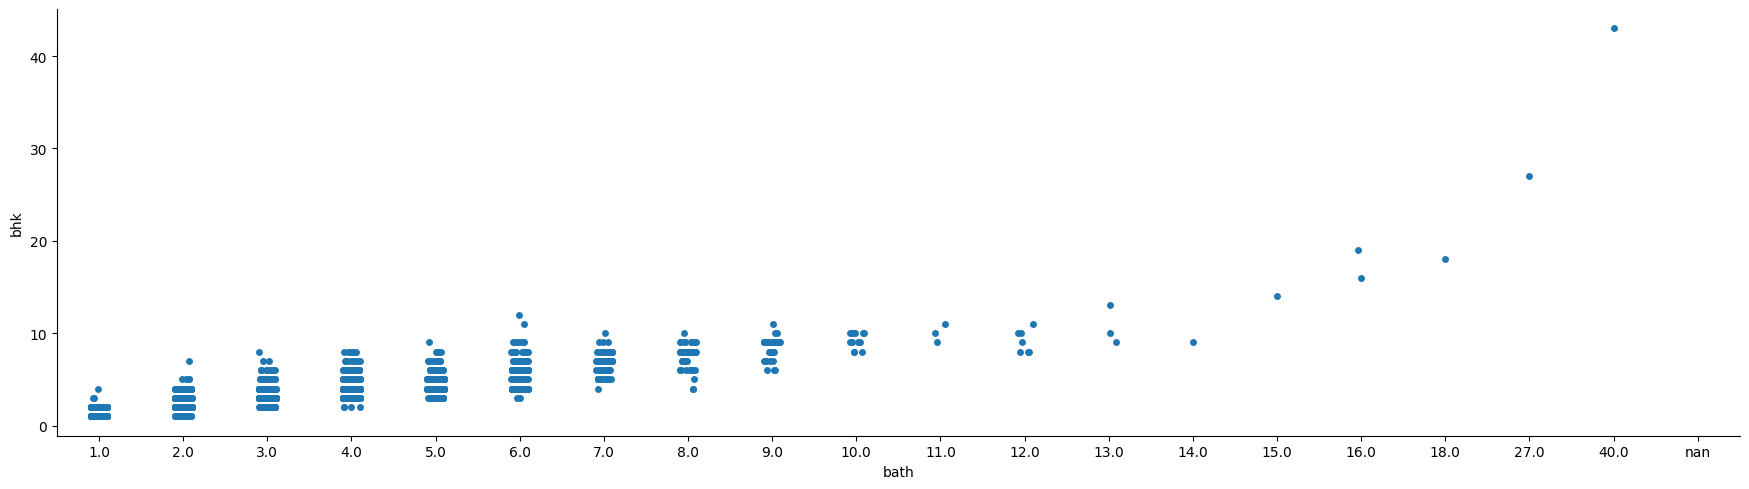

In [25]:
g = sns.catplot(data=df3, x="bath", y="bhk")
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

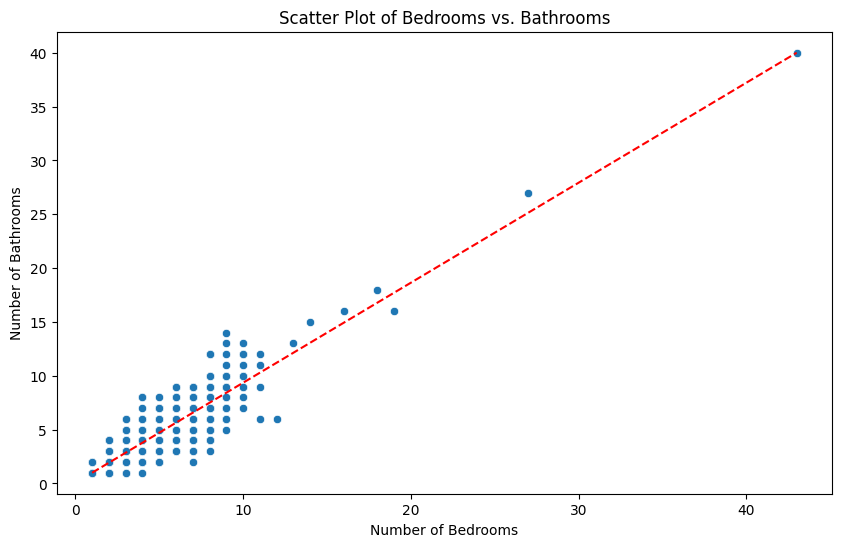

In [26]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df3['bhk'], y=df3['bath'])
plt.plot([df3['bhk'].min(), df3['bhk'].max()],
         [df3['bath'].min(), df3['bath'].max()], color='red', linestyle='--')

plt.title('Scatter Plot of Bedrooms vs. Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.show()

As we can see that there's a high correlation between number of bedrooms and bathrooms which almost close to be the same number

##### Step 2: Dealing with Null Values and the Rationale
<P> To handle the missing values in the bath column, we replace all null entries with the corresponding bhk value for each row. This approach is based on the assumption that the number of bathrooms typically matches the number of bedrooms. For example, a property listed as a 3 BHK is likely to have 3 bathrooms. This method ensures consistency and leverages existing data to make reasonable imputations.

<P> According to this Article: <a> https://www.modobath.com/inspiration/the-ideal-number-of-bathrooms-you-need-to-maximize-home-value/#:~:text=In%20general%2C%20each%20bedroom%20should,an%20extra%20bathroom%20for%20guests </a>

In [27]:
df3['bath'] = df3.apply(lambda row: row['bhk'] if pd.isnull(row['bath']) else row['bath'], axis=1)
df3.isnull().sum()

availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

### 5.Checking and Handling Unique Values in bhk
<p> In this step, we focus on examining the bhk column. Ensuring the accuracy and consistency of this feature is crucial for building a reliable model. By analyzing the unique values within this column, we can identify and address any anomalies or outliers that may impact the quality of our dataset.

##### Step 1: Identifying Anomalies in bhk Values
<p> To ensure the quality and consistency of our dataset, we need to check the bhk values for any anomalies or outliers. The bhk column represents the number of bedrooms, halls, and kitchens in a property. Here's how we address unique values in this column

In [28]:
px.histogram(df3, x="bhk")

##### Step 2: Handling Outliers in bhk Values
<p> we observed that the bhk column contains a small number of entries with values greater than 10. With only a few records exhibiting such values, they are not representative of typical properties in the dataset. Extreme values like 27 or more are uncommon in standard real estate markets and may result from data entry errors or rare cases. Removing these outliers ensures the dataset remains focused on more realistic and representative property sizes, thereby improving the accuracy and reliability of subsequent analyses and models.

In [29]:
df4 = df3[df3.bhk < 10]
df4['bhk'].value_counts()

bhk
2.0    5528
3.0    4856
4.0    1417
1.0     654
5.0     355
6.0     221
7.0     100
8.0      89
9.0      53
Name: count, dtype: int64

#### 6.Analyzing Price Distribution and Handling Extreme Values
<P> After cleaning the dataset and addressing missing values, the next step is to analyze the distribution of property prices. This helps in understanding the range and frequency of prices and identifying any extreme values that may skew the analysis.

##### Step 1: Price Distribution by Range
<P> To analyze the distribution of prices, we categorize them into price ranges. This approach groups prices into bins and counts the number of occurrences within each range.

<P> The resulting output shows the count of properties falling within each price range, helping us understand the price distribution more clearly. For example, there are 856 properties priced between 150 and 200, while only a few properties exceed 1000.

In [30]:
# Define price ranges
bins = range(150, int(df4['price'].max()) + 50, 50)

# Bin the prices and count occurrences in each bin without creating a new column in the DataFrame
price_counts = pd.cut(df4['price'], bins=bins, right=False).value_counts()

print(price_counts)

price
[150, 200)      856
[200, 250)      479
[250, 300)      301
[300, 350)      219
[350, 400)      135
[400, 450)      104
[450, 500)       60
[500, 550)       47
[550, 600)       33
[600, 650)       30
[650, 700)       27
[700, 750)       20
[750, 800)       16
[900, 950)       11
[800, 850)       11
[950, 1000)       9
[850, 900)        6
[1000, 1050)      5
[1500, 1550)      3
[1100, 1150)      3
[1800, 1850)      3
[1200, 1250)      3
[1250, 1300)      3
[1400, 1450)      3
[2000, 2050)      2
[1700, 1750)      2
[2200, 2250)      2
[1900, 1950)      2
[2600, 2650)      2
[2700, 2750)      2
[2250, 2300)      1
[2300, 2350)      1
[2100, 2150)      1
[2050, 2100)      1
[1950, 2000)      1
[2800, 2850)      1
[1550, 1600)      1
[1850, 1900)      1
[1600, 1650)      1
[1050, 1100)      1
[1150, 1200)      1
[2900, 2950)      1
[1650, 1700)      1
[1450, 1500)      0
[1350, 1400)      0
[2350, 2400)      0
[2400, 2450)      0
[1750, 1800)      0
[2500, 2550)      0
[2550, 2600)  

<Axes: xlabel='price'>

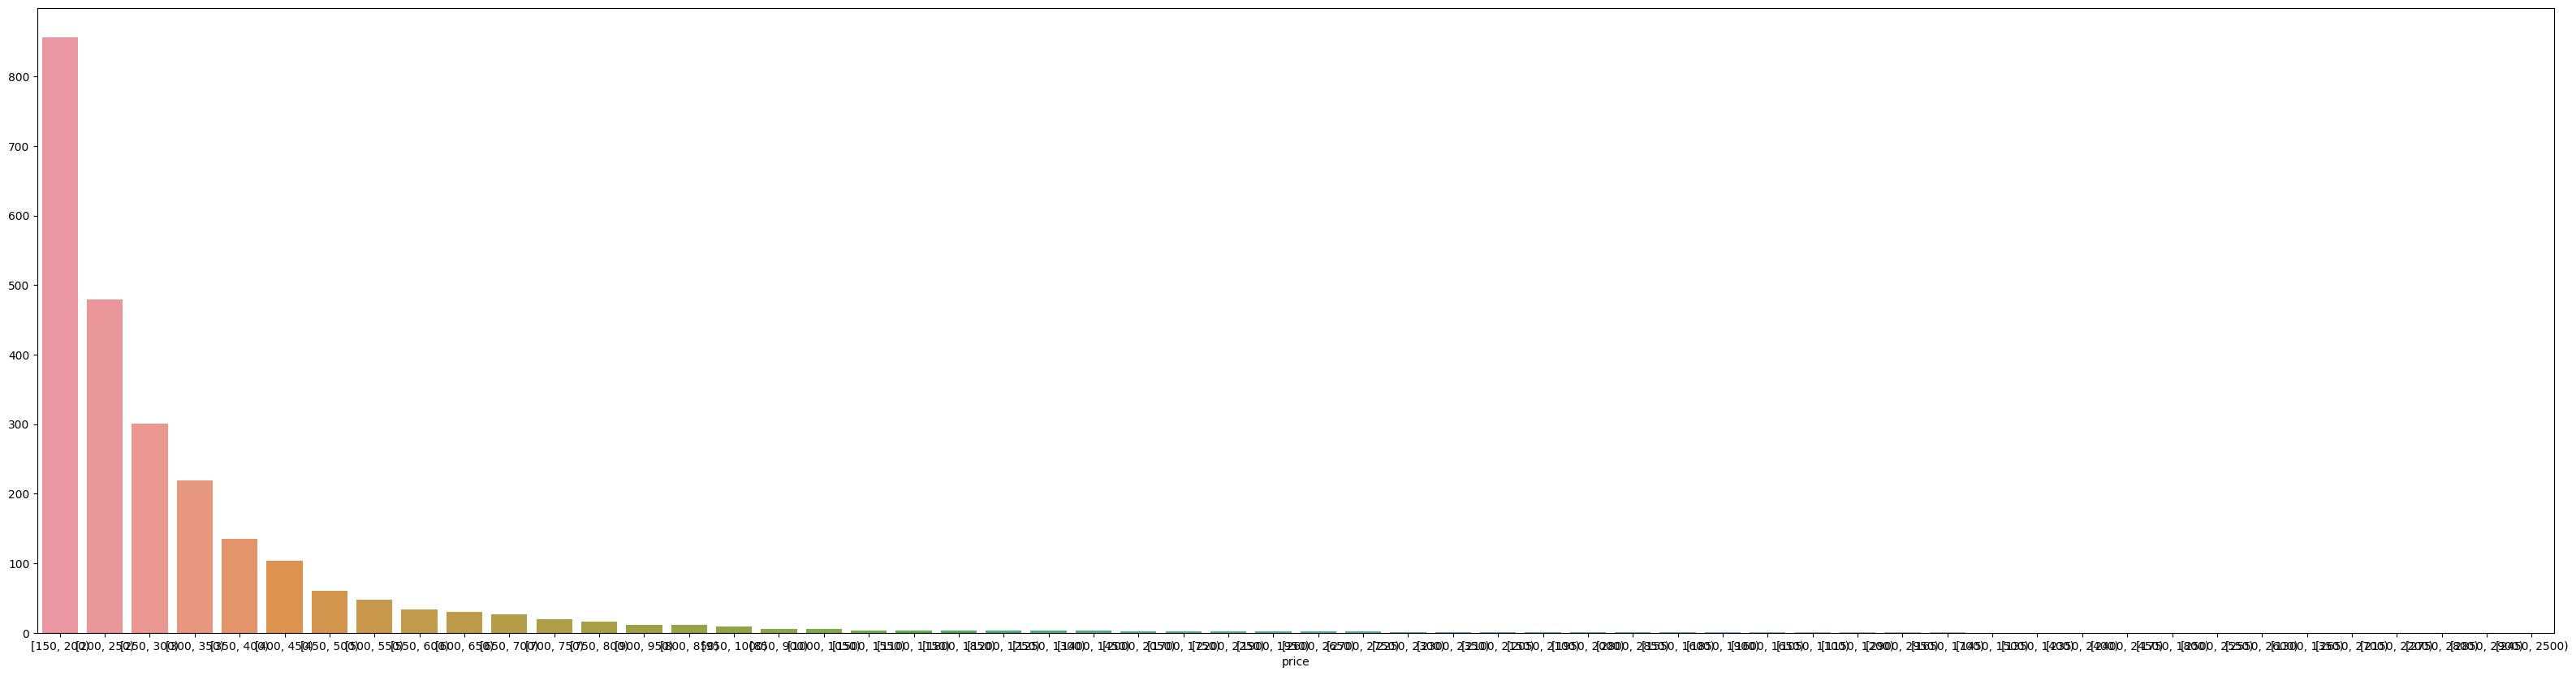

In [31]:
plt.figure(figsize=(40, 10))
sns.barplot(x = price_counts.index.astype(str), y= price_counts.values)

#### Handling Extreme Price Values
<P> Upon examining the price distribution, we observe that there are very few properties with prices greater than 1000. Given that these prices are significantly higher than the majority of the data points, they can be considered extreme values. Extreme values can often be outliers or result from data entry errors, and including them in the dataset may distort the overall analysis.

<P> Therefore, to maintain the integrity and focus of the dataset, we decide to remove these extreme price values. By filtering out these high-value entries, we ensure that the dataset remains representative of typical property prices, thus enhancing the accuracy of any subsequent analyses or models.

In [32]:
df5 = df4[df4.price < 1000]
df5.head()

,availability,location,total_sqft,bath,balcony,price,bhk
0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0


## 7.Feature Engineering

<P>
In this step, we focus on deriving features such as price_per_sqft to normalize property prices based on size and converting availability into a binary format to simplify the analysis. 
<P>These modifications will aid in uncovering meaningful patterns and improving the accuracy of our price predictions.

#### Step 1: Price Per Square Foot
To facilitate a more standardized comparison of properties, we create a new feature called price_per_sqft. This feature is calculated by dividing the price column by the total_sqft column. It provides a normalized value that reflects the cost of each square foot, making it easier to compare properties of different sizes.

<P> There's also a need to convert the cuurency from Indian Rupee to USD as this project goal to help external students get a sense about prices over regions to buy

In [33]:
# Convert currency from Indian Rupee into United States Dollar ( 0.012 USD per ₹)
df5['price'] = df5['price'] * 0.012

# Calculate price per square foot and round to 2 decimal points 
df5['price_per_sqft'] = ((df5['price'] * 100000) / df5['total_sqft']).round(2)

# Display the first few rows of the dataframe
df5.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27928\1969641379.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27928\1969641379.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,0.46884,2.0,44.40
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,1.44000,4.0,55.38
2,Ready To Move,Uttarahalli,1440.0,2.0,3.0,0.74400,3.0,51.67
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,1.14000,3.0,74.95
4,Ready To Move,Kothanur,1200.0,2.0,1.0,0.61200,2.0,51.00


Step 2:  Availability
<P> Next, we convert the availability column into binary values to simplify its representation. The availability of a property is transformed into a binary format where 1 denotes "Ready To Move" and 0 indicates "Not Ready." This transformation helps streamline the data for model input and analysi.

<p>After this conversion, we drop the original availability column, as the binary representation is more effective for our analytical and predictive models.

In [34]:
unique_availability_values = df5['availability'].unique()
print(unique_availability_values)

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb'
 '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov'
 '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov'
 '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul' '16-Sep' '15-Oct'
 '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan'
 '14-Jul']


In [35]:
df5['availability_binary'] = df5['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)
print(df5['availability_binary'].value_counts())
df5.head()

availability_binary
1    10520
0     2705
Name: count, dtype: int64


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27928\2229326535.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,availability_binary
0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,0.46884,2.0,44.40,0
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,1.44000,4.0,55.38,1
2,Ready To Move,Uttarahalli,1440.0,2.0,3.0,0.74400,3.0,51.67,1
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,1.14000,3.0,74.95,1
4,Ready To Move,Kothanur,1200.0,2.0,1.0,0.61200,2.0,51.00,1


In [36]:
df6 = df5.drop('availability', axis='columns')
df6.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,availability_binary
0,Electronic City Phase II,1056.0,2.0,1.0,0.46884,2.0,44.40,0
1,Chikka Tirupathi,2600.0,5.0,3.0,1.44000,4.0,55.38,1
2,Uttarahalli,1440.0,2.0,3.0,0.74400,3.0,51.67,1
3,Lingadheeranahalli,1521.0,3.0,1.0,1.14000,3.0,74.95,1
4,Kothanur,1200.0,2.0,1.0,0.61200,2.0,51.00,1


In [37]:
df6.shape

(13225, 8)

#### step 4: Handling Location Data
Location data often contains inconsistencies and variations that can complicate analysis. In this step, we standardize location names to ensure consistency and identify duplicates or near-duplicates. By consolidating these variations, we improve the accuracy of our data and the effectiveness of our subsequent analyses.

In [38]:
df6['location'].value_counts(sort=False)

location
Electronic City Phase II                           132
Chikka Tirupathi                                    17
Uttarahalli                                        186
Lingadheeranahalli                                  23
Kothanur                                            66
                                                  ... 
Pattegarhpalya                                       1
Tilak Nagar                                          1
12th cross srinivas nagar banshankari 3rd stage      1
Havanur extension                                    1
Abshot Layout                                        1
Name: count, Length: 1291, dtype: int64

#### Step 1: Identifying and Standardizing Location Names
<P> We start by standardizing location names to simplify comparisons and identify duplicates. 

<P> This involves:
Standardizing Location Names: We apply a function to convert location names to lowercase, strip any leading or trailing spaces, and remove spaces between words. This helps in identifying duplicates more accurately.

In [39]:
def standardize_location(name):
    return name.lower().strip().replace(' ', '')

df6['standardized_location'] = df6['location'].apply(standardize_location)

In [40]:
exact_duplicates = df6[df6.duplicated(['standardized_location'], keep=False)]

In [41]:
exact_duplicates

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,availability_binary,standardized_location
0,Electronic City Phase II,1056.0,2.0,1.0,0.46884,2.0,44.40,0,electroniccityphaseii
1,Chikka Tirupathi,2600.0,5.0,3.0,1.44000,4.0,55.38,1,chikkatirupathi
2,Uttarahalli,1440.0,2.0,3.0,0.74400,3.0,51.67,1,uttarahalli
3,Lingadheeranahalli,1521.0,3.0,1.0,1.14000,3.0,74.95,1,lingadheeranahalli
4,Kothanur,1200.0,2.0,1.0,0.61200,2.0,51.00,1,kothanur
...,...,...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,2.77200,5.0,80.28,1,whitefield
13316,Richards Town,3600.0,5.0,0.0,4.80000,4.0,133.33,1,richardstown
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,0.72000,2.0,63.10,1,rajarajeshwarinagar
13318,Padmanabhanagar,4689.0,4.0,1.0,5.85600,4.0,124.89,0,padmanabhanagar


Finding Near-Duplicates: Using fuzzy matching techniques, we identify locations that are similar but not exactly the same. We set a similarity threshold to consider two locations as near-duplicates.

In [42]:
# Find near duplicates
def find_near_duplicates(locations, threshold=90):
    near_duplicates = {}
    for loc in locations:
        matches = process.extract(loc, locations, scorer=fuzz.token_sort_ratio)
        near_duplicates[loc] = [match for match in matches if match[1] >= threshold and match[0] != loc]
    return near_duplicates

unique_locations = df6['standardized_location'].unique()
near_duplicates = find_near_duplicates(unique_locations, threshold=95)
near_duplicates = {key: value for key, value in near_duplicates.items() if value}

In [43]:
near_duplicates

{'whitefield': [('whitefield,', 100)],
 'rajarajeshwarinagar': [('rajarajeshwarinagara', 97),
  ('rajarajeshearinagar', 95)],
 'manayatatechpark': [('manyatatechpark', 97)],
 'bellandur': [('bellandur,', 100)],
 'kanakpuraroad': [('kanakapuraroad', 96), ('kanakapuraroad,', 96)],
 'electronicscityphase1': [('electroniccityphase1,', 98)],
 'sarjapurroad': [('sarjapurroad,', 100)],
 'haralurroad': [('haralurroad,', 100)],
 'tdasarahalli': [('dasarahalli', 96)],
 'akshayanagar': [('akshyanagar', 96)],
 'vijayanagar': [('vijaynagar', 95)],
 '8thblockkoramangala': [('4thblockkoramangala', 95),
  ('5thblockkoramangala', 95),
  ('6thblockkoramangala', 95),
  ('7thblockkoramangala', 95)],
 'dasarahalli': [('tdasarahalli', 96)],
 'srirampura': [('srirampuram', 95)],
 'sunderramshettynagar': [('sundarramshettynagar', 95)],
 'basaveshwaranagar': [('basaveshwarnagar', 97)],
 'narayanapura': [('bnarayanapura', 96), ('anarayanapura', 96)],
 'doddanekkundi': [('doddanekundi', 96)],
 'battarahalli': [(

Creating Replacement Dictionary: We create a dictionary to map near-duplicates to their most frequent representation.

In [44]:
replacement_dict = {}
for location, duplicates in near_duplicates.items():
  all_occurrences = [location] + [d[0] for d in duplicates]
  most_frequent = max(set(all_occurrences), key=all_occurrences.count)
  replacement_dict[location] = most_frequent
  for duplicate in duplicates:
    replacement_dict[duplicate[0]] = most_frequent

In [45]:
replacement_dict

{'whitefield': 'whitefield',
 'whitefield,': 'whitefield',
 'rajarajeshwarinagar': 'rajarajeshearinagar',
 'rajarajeshwarinagara': 'rajarajeshwarinagara',
 'rajarajeshearinagar': 'rajarajeshearinagar',
 'manayatatechpark': 'manayatatechpark',
 'manyatatechpark': 'manayatatechpark',
 'bellandur': 'bellandur,',
 'bellandur,': 'bellandur,',
 'kanakpuraroad': 'kanakapuraroad',
 'kanakapuraroad': 'kanakapuraroad',
 'kanakapuraroad,': 'kanakapuraroad',
 'electronicscityphase1': 'electronicscityphase1',
 'electroniccityphase1,': 'electronicscityphase1',
 'sarjapurroad': 'sarjapurroad',
 'sarjapurroad,': 'sarjapurroad',
 'haralurroad': 'haralurroad',
 'haralurroad,': 'haralurroad',
 'tdasarahalli': 'tdasarahalli',
 'dasarahalli': 'tdasarahalli',
 'akshayanagar': 'akshayanagar',
 'akshyanagar': 'akshayanagar',
 'vijayanagar': 'vijayanagar',
 'vijaynagar': 'vijayanagar',
 '8thblockkoramangala': '4thblockkoramangala',
 '4thblockkoramangala': '4thblockkoramangala',
 '5thblockkoramangala': '4thbloc

Replacing Near-Duplicate Names: We replace the near-duplicate names in the dataset with a standardized name based on the most frequent representation.

In [46]:
df6['standardized_location'] = df6['standardized_location'].replace(replacement_dict)

#### Visual Check for Outliers
<p> We use various visualizations to identify and address outliers effectively. By repeatedly analyzing these plots, we can detect anomalies and perform the necessary data cleaning.

#### Step 1: Standardizing and Normalizing Data
<p> Before plotting charts, we standardize and normalize the values to ensure they are easily visible and interpretable. This preprocessing step allows for clearer detection of outliers and more effective visualization of data trends.

In [47]:
df7 = df6.copy()
# Log transformation for large values
df7['log_total_sqft'] = np.log1p(df7['total_sqft'])
df7['log_price'] = np.log1p(df7['price'])
df7['log_price_per_sqft'] = np.log1p(df7['price_per_sqft'])

# Standardization
scaler = StandardScaler()
df7['std_total_sqft'] = scaler.fit_transform(df7[['total_sqft']])
df7['std_price'] = scaler.fit_transform(df7[['price']])
df7['std_price_per_sqft'] = scaler.fit_transform(df7[['price_per_sqft']])

# Normalization
normalizer = MinMaxScaler()
df7['norm_total_sqft'] = normalizer.fit_transform(df7[['total_sqft']])
df7['norm_price'] = normalizer.fit_transform(df7[['price']])
df7['norm_price_per_sqft'] = normalizer.fit_transform(df7[['price_per_sqft']])

#### Step 2: Reusable Visualization Function
<p> To streamline the process of plotting charts for outlier detection, I have created a function that standardizes and normalizes the values, making it easier to visualize and analyze the data. This function can be called repeatedly, ensuring consistency and efficiency in our analysis.

In [48]:
def plot_data_visualizations(df):
    fig, axes = plt.subplots(4, 2, figsize=(20, 40))  # Adjust grid size as needed
    fig.suptitle('Additional Data Visualizations', fontsize=20)

    # Box Plot of Log-Transformed Price per Square Foot by Location
    sns.boxplot(x='standardized_location', y='log_price_per_sqft', data=df, ax=axes[0, 0])
    axes[0, 0].set_title('Log Price per Sqft by Location')
    axes[0, 0].set_xlabel('Location')
    axes[0, 0].set_ylabel('Log Price per Sqft')
    axes[0, 0].tick_params(axis='x', rotation=90)

    # Scatter Plot of Log-Transformed Total Square Feet vs Log Price per Square Foot
    axes[0, 1].scatter(df['log_total_sqft'], df['log_price_per_sqft'])
    axes[0, 1].set_title('Log Total Sqft vs Log Price per Sqft')
    axes[0, 1].set_xlabel('Log Total Sqft')
    axes[0, 1].set_ylabel('Log Price per Sqft')

    # Histogram of Log-Transformed Price
    axes[1, 0].hist(df['log_price'], bins=30)
    axes[1, 0].set_title('Log Distribution of Price')
    axes[1, 0].set_xlabel('Log Price')
    axes[1, 0].set_ylabel('Frequency')

    # Scatter Plot of Log-Transformed Total Square Feet vs Log Price
    axes[1, 1].scatter(df['log_total_sqft'], df['log_price'])
    axes[1, 1].set_title('Log Total Sqft vs Log Price')
    axes[1, 1].set_xlabel('Log Total Sqft')
    axes[1, 1].set_ylabel('Log Price')

    # Box Plot of Standardized Total Square Feet
    sns.boxplot(x=df['std_total_sqft'], ax=axes[2, 0])
    axes[2, 0].set_title('Standardized Box Plot of Total Sqft')
    axes[2, 0].set_xlabel('Standardized Total Sqft')

    # Histogram of Normalized Total Square Feet with limited x-axis
    axes[2, 1].hist(df['norm_total_sqft'], bins=30)
    axes[2, 1].set_title('Normalized Distribution of Total Sqft')
    axes[2, 1].set_xlabel('Normalized Total Sqft')
    axes[2, 1].set_ylabel('Frequency')

    # Scatter Plot of Standardized Total Square Feet vs Number of Bathrooms (Bath)
    axes[3, 0].scatter(df['std_total_sqft'], df['bath'])
    axes[3, 0].set_title('Standardized Total Sqft vs Number of Bathrooms (Bath)')
    axes[3, 0].set_xlabel('Standardized Total Sqft')
    axes[3, 0].set_ylabel('Number of Bathrooms (Bath)')

    # Hexbin Plot of Log-Transformed Total Square Feet vs Number of Bathrooms (Bath)
    hb = axes[3, 1].hexbin(df['log_total_sqft'], df['bath'], gridsize=30, cmap='Blues')
    axes[3, 1].set_title('Hexbin Plot of Log Total Sqft vs Number of Bathrooms (Bath)')
    axes[3, 1].set_xlabel('Log Total Sqft')
    axes[3, 1].set_ylabel('Number of Bathrooms (Bath)')
    cb = plt.colorbar(hb, ax=axes[3, 1])
    cb.set_label('Counts')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
    plt.show()

#### Step 3: Visualize before removing outliers

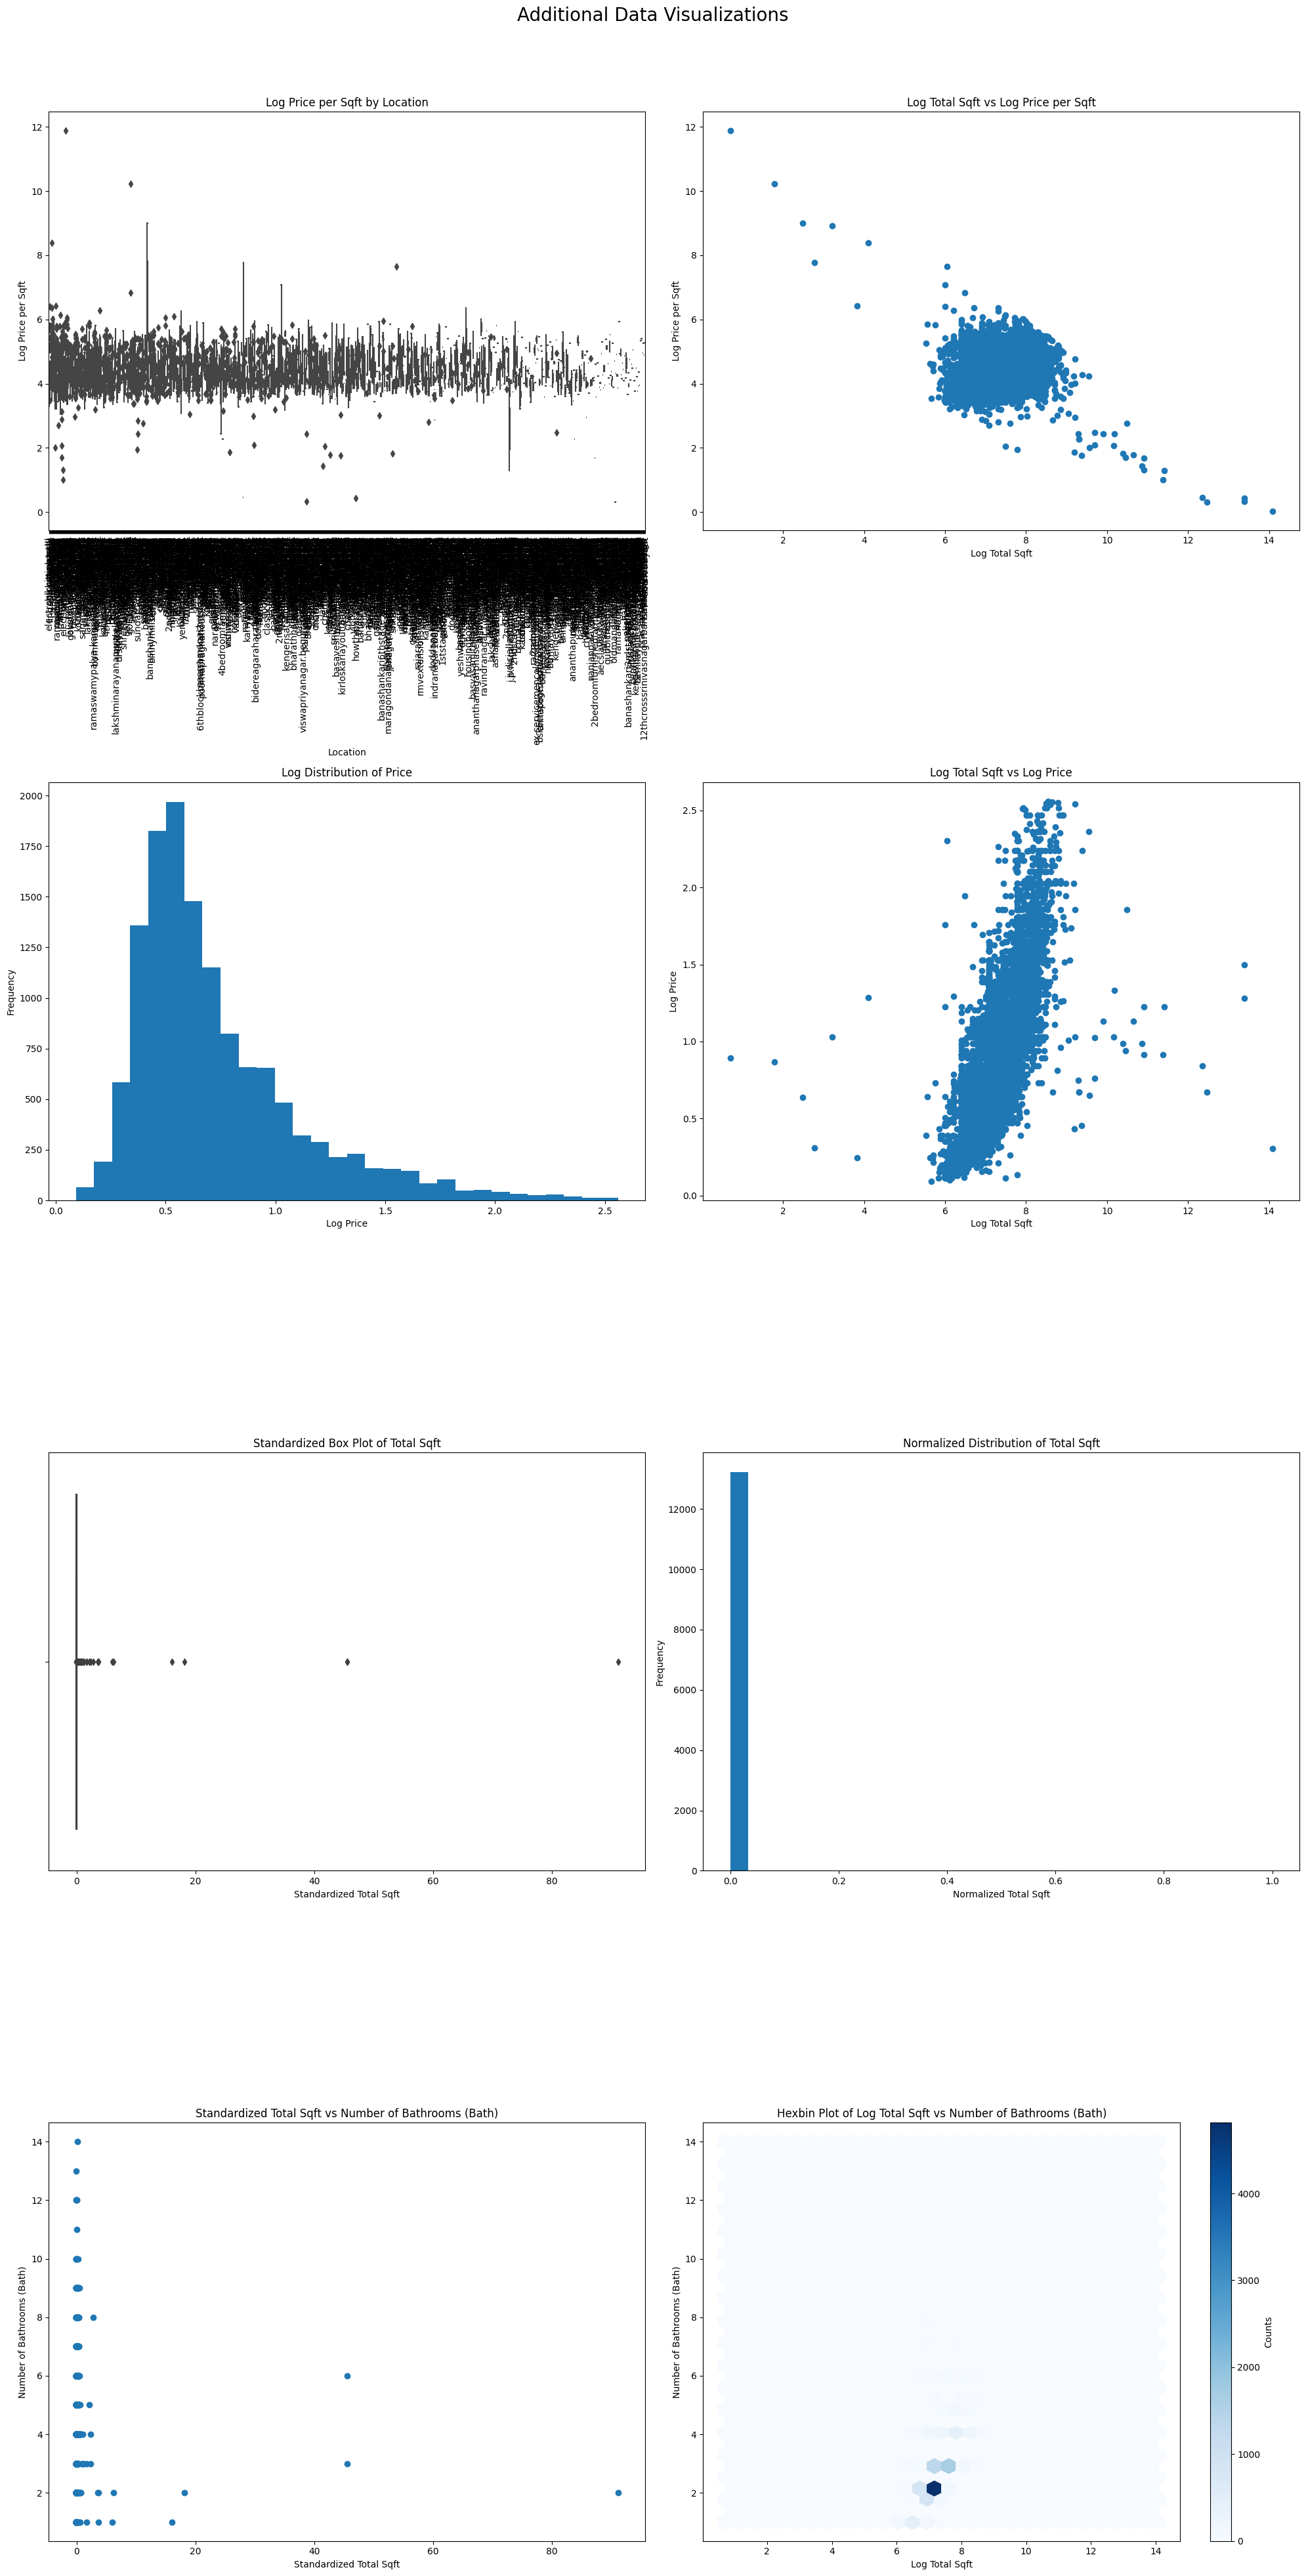

In [49]:
plot_data_visualizations(df7)

Observations from Charts
<P> From the charts, I have identified several key observations:

Extreme Price Values: 
- There are properties with exceptionally high and low price per square foot. 
- Properties with Unusually High Square Footage Relative to the Number of Bathrooms: These may indicate potential data entry errors or unusual property features. 
- Properties with Very Low Square Footage (e.g., below 200 sqft): These are considered outliers and may require exclusion.

#### Step 4: Outlier Removal for Log-Price and Total Square Footage
In this code cell, we focus on outlier detection and removal to refine our dataset for more accurate analysis. We first address outliers in the log_price_per_sqft column by filtering the data to exclude extreme values beyond the 1st and 99th percentiles. 
<P> Next, we handle outliers in the total_sqft column by standardizing the values and removing those that fall outside 3 standard deviations from the mean. This cleaning process aims to enhance the quality of the dataset, ensuring that our subsequent analysis is based on more reliable and representative data. Finally, we reset the DataFrame index to maintain a clean dataset structure.

In [50]:
print(f"Shape of DataFrame Before outlier removal: {df7.shape}")

low_percentile = df7['log_price_per_sqft'].quantile(0.01)
high_percentile = df7['log_price_per_sqft'].quantile(0.99)

# Remove outliers
df7 = df7[(df7['log_price_per_sqft'] >= low_percentile) & (df7['log_price_per_sqft'] <= high_percentile)]

# 2. Remove total sqft outliers

# Standardize total_sqft
df7['standardized_total_sqft'] = stats.zscore(df7['total_sqft'])

# Remove points beyond 3 standard deviations
df7 = df7[np.abs(df7['standardized_total_sqft']) <= 3]

# Reset index after removing rows
df7 = df7.reset_index(drop=True)

print(f"Shape of DataFrame after outlier removal: {df7.shape}")

Shape of DataFrame Before outlier removal: (13225, 18)
Shape of DataFrame after outlier removal: (12670, 19)


#### Step 5: Filter Out Unlikely Bathroom Counts
<p> We remove rows where properties with less than 2000 square feet have 4 or more bathrooms, as such cases are considered improbable. This helps in refining the dataset to better reflect realistic property characteristics.

In [51]:
# Filter rows based on conditions
df8 = df7[~((df7['bath'] >= 4) & (df7['total_sqft'] < 2000))]
df8.shape

(11857, 19)

#### Step 6: Filter Out Small Properties
We remove houses with a total square footage of less than 300, as this is below the typical benchmark for a 1 BHK flat. This step helps prevent skewing the dataset with unusually small properties.

In [52]:
df9 = df8[~(df8['total_sqft'] < 300)]
df9.shape

(11853, 19)

#### Step 7: Reapply Visualization Function
We will reapply the visualization function to review the dataset and identify any potential outliers or anomalies that may have been missed during previous cleaning steps. By generating updated plots, we ensure a thorough examination of the data and confirm that all relevant issues have been addressed.

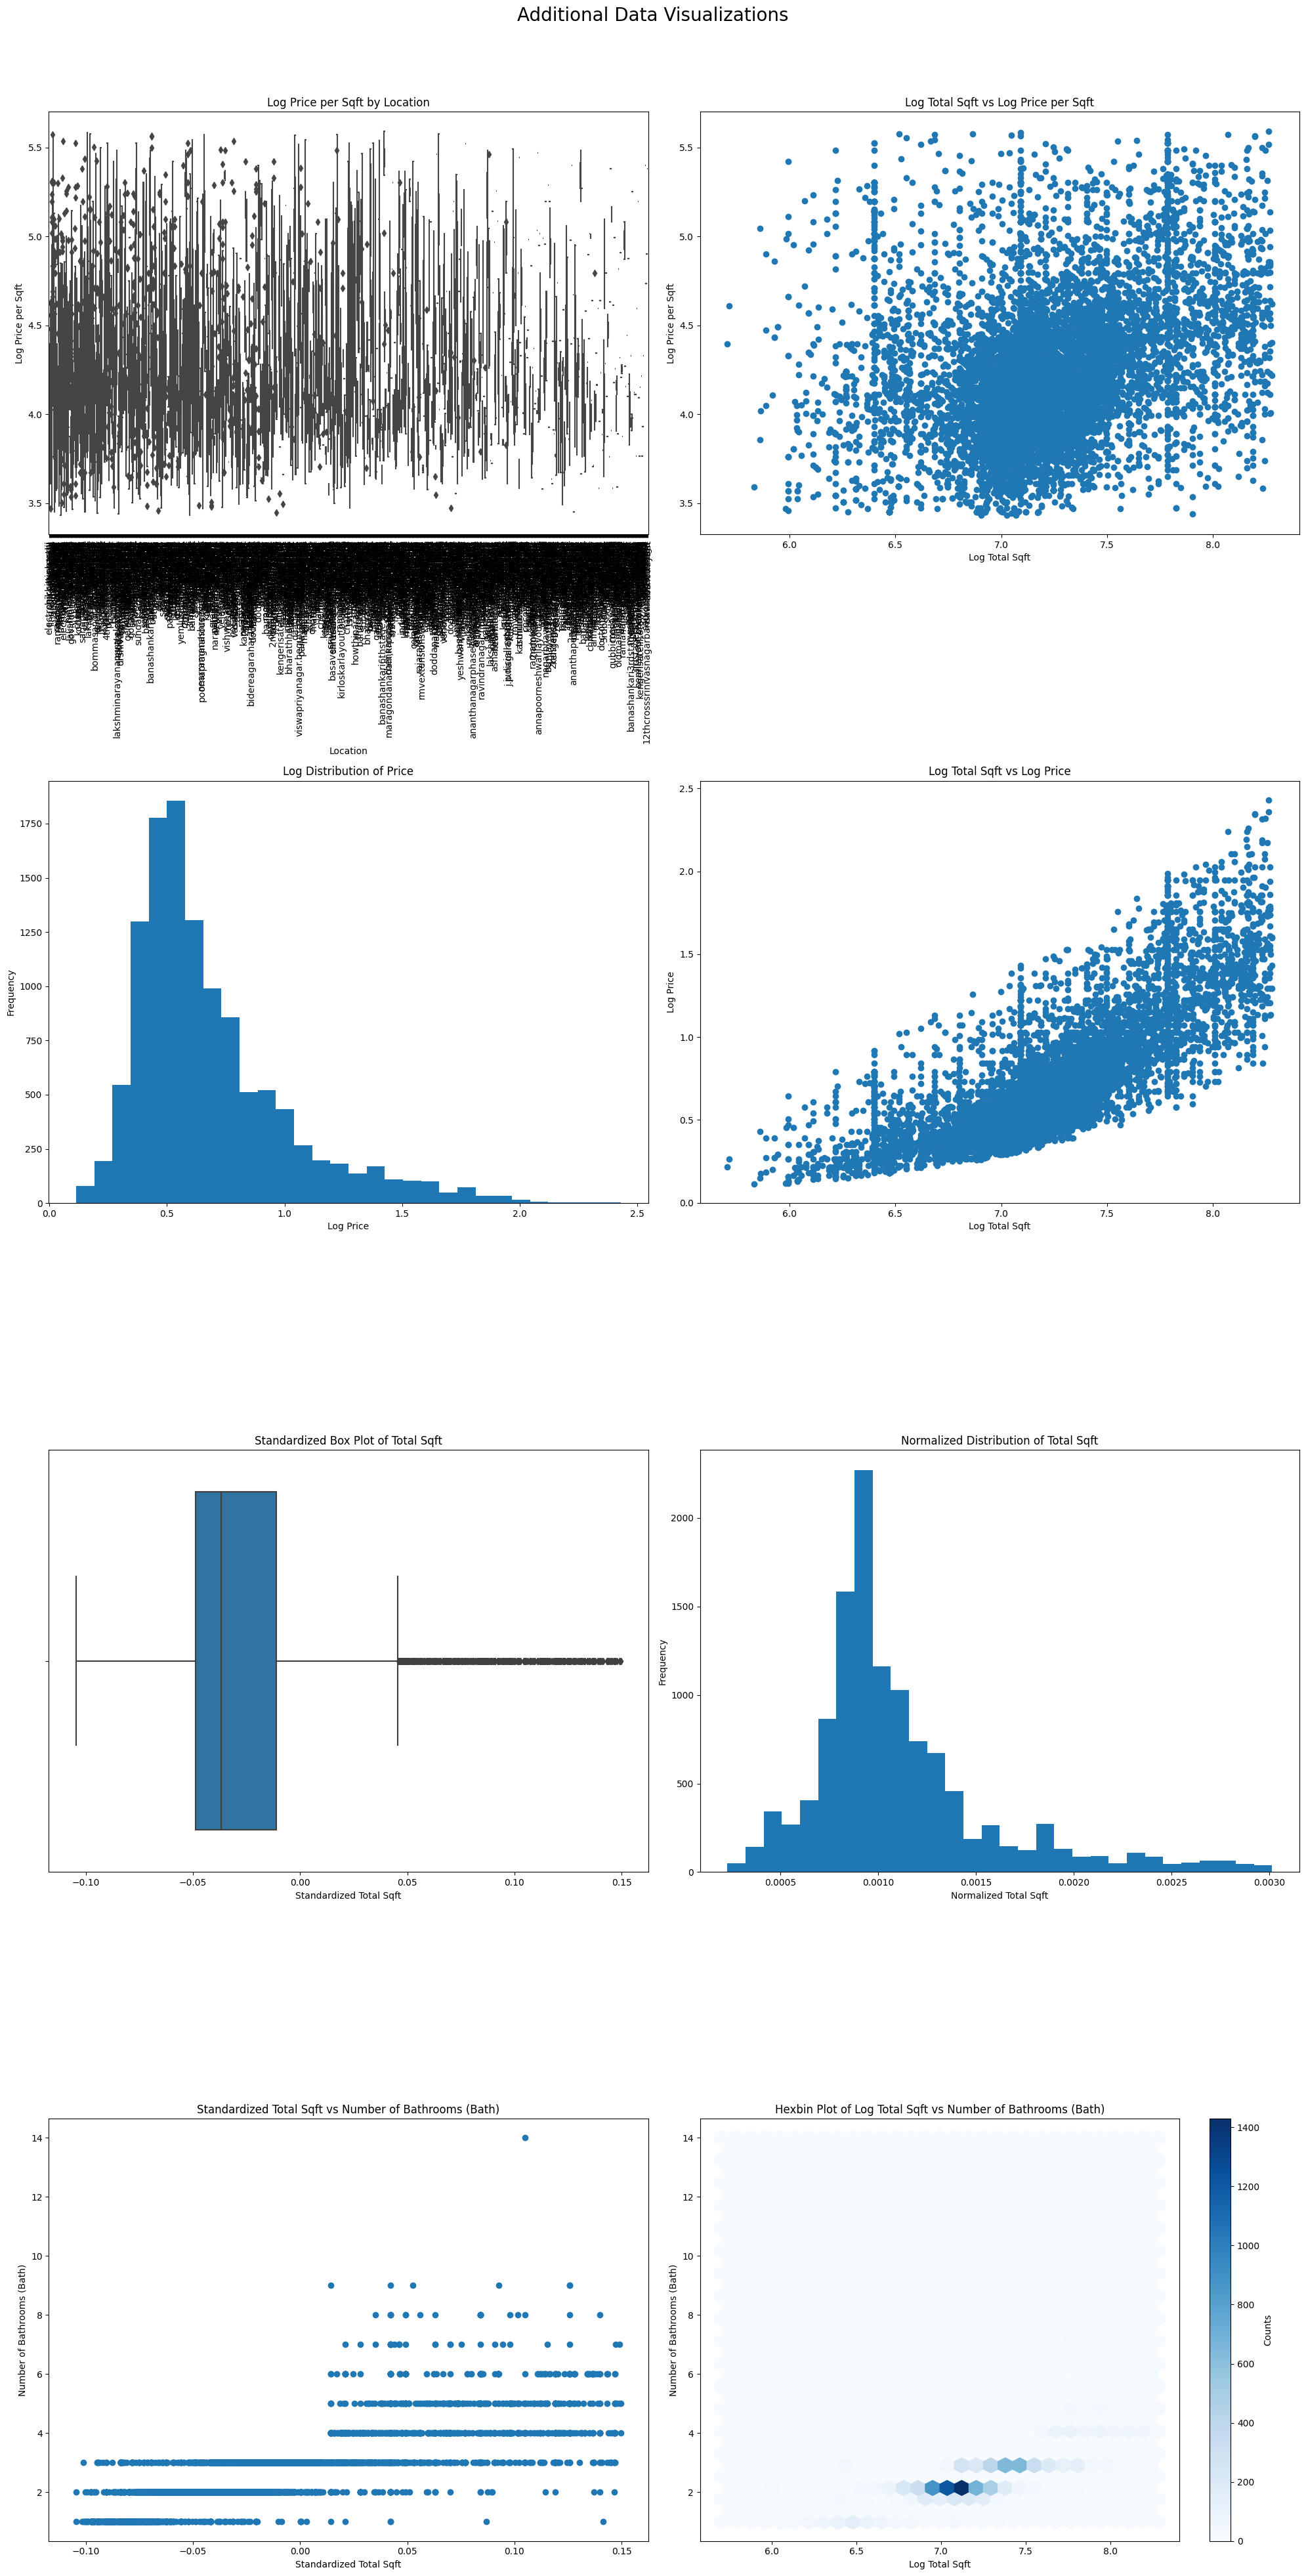

In [53]:
plot_data_visualizations(df9)

#### Final Review of Outlier Removal
Aside from the expected density of data in the lower price ranges, no additional anomalies are observed. This pattern is typical in real estate data, where lower-cost areas generally have higher sales volumes compared to higher-cost areas. The visual inspection confirms that the dataset appears consistent with real-world expectations.

### 8.Choosing Mean Encoding for Location Values
Mean encoding was selected for location values to effectively capture location-specific price trends while mitigating the risk of overfitting. This method balances the influence of less frequent locations with the overall global mean, providing a more stable and reliable representation of location-based price variations.

#### Step 1: Initial Mean Encoding
In this cell, we calculate the mean price for each location and map these mean values to the original DataFrame as location_encoded. This step provides a basic mean encoding based on the location's average price

In [54]:
mean_prices = df9.groupby('standardized_location')['price'].mean()

# Map the mean prices to the original DataFrame
df9['location_encoded'] = df9['standardized_location'].map(mean_prices)

display(df9)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27928\3986703919.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,availability_binary,standardized_location,log_total_sqft,log_price,log_price_per_sqft,std_total_sqft,std_price,std_price_per_sqft,norm_total_sqft,norm_price,norm_price_per_sqft,standardized_total_sqft,location_encoded
0,Electronic City Phase II,1056.0,2.0,1.0,0.46884,2.0,44.40,0,electroniccityphaseii,6.963190,0.384473,3.815512,-0.051716,-0.637914,-0.038706,0.000807,0.031479,0.000308,-0.565018,0.536885
1,Chikka Tirupathi,2600.0,5.0,3.0,1.44000,4.0,55.38,1,chikkatirupathi,7.863651,0.891998,4.032114,0.056086,0.131356,-0.030123,0.001989,0.113475,0.000384,1.339606,1.368750
2,Uttarahalli,1440.0,2.0,3.0,0.74400,3.0,51.67,1,uttarahalli,7.273093,0.556181,3.964046,-0.024905,-0.419955,-0.033023,0.001101,0.054711,0.000359,-0.091329,0.653828
3,Lingadheeranahalli,1521.0,3.0,1.0,1.14000,3.0,74.95,1,lingadheeranahalli,7.327781,0.760806,4.330075,-0.019250,-0.106278,-0.014827,0.001163,0.088146,0.000520,0.008590,1.384915
4,Kothanur,1200.0,2.0,1.0,0.61200,2.0,51.00,1,kothanur,7.090910,0.477476,3.951244,-0.041662,-0.524514,-0.033547,0.000918,0.043566,0.000354,-0.387385,0.997953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,Green Glen Layout,1715.0,3.0,3.0,1.34400,3.0,78.37,1,greenglenlayout,7.447751,0.851859,4.374120,-0.005705,0.055313,-0.012154,0.001312,0.105370,0.000544,0.247901,1.423832
12666,Whitefield,3453.0,4.0,0.0,2.77200,5.0,80.28,1,whitefield,8.147288,1.327605,4.397900,0.115642,1.186453,-0.010661,0.002642,0.225937,0.000557,2.391837,1.148521
12667,Richards Town,3600.0,5.0,0.0,4.80000,4.0,133.33,1,richardstown,8.188967,1.757858,4.900299,0.125906,2.792861,0.030805,0.002754,0.397163,0.000926,2.573171,2.537143
12668,Raja Rajeshwari Nagar,1141.0,2.0,1.0,0.72000,2.0,63.10,1,rajarajeshearinagar,7.040536,0.542324,4.160444,-0.045782,-0.438966,-0.024089,0.000872,0.052685,0.000438,-0.460165,0.705702


#### Step 2: Smoothed Mean Encoding
Here, we refine the mean encoding by applying smoothing to account for locations with fewer observations. We calculate a global mean and use a smoothing parameter to blend the location-specific mean with the global mean. 
<p> This approach helps to stabilize the encoding and reduce the impact of sparse data, resulting in a more balanced representation of location values.

In [55]:
# Calculate the global mean of the target variable
global_mean = df9['price'].mean()

# Define the smoothing parameter
m = 3

# Apply smoothing to the target encoding
def smooth_mean_encoding(col, target, m, global_mean):
    agg = df9.groupby(col)[target].agg(['mean', 'count'])
    mean_encoded = (agg['count'] * agg['mean'] + m * global_mean) / (agg['count'] + m)
    return mean_encoded

# Apply the smooth mean encoding to the 'standardized_location' column
mean_encoded = smooth_mean_encoding('standardized_location', 'price', m, global_mean)
df9['location_encoded'] = df9['standardized_location'].map(mean_encoded)

display(df9)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27928\436114190.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,availability_binary,standardized_location,log_total_sqft,log_price,log_price_per_sqft,std_total_sqft,std_price,std_price_per_sqft,norm_total_sqft,norm_price,norm_price_per_sqft,standardized_total_sqft,location_encoded
0,Electronic City Phase II,1056.0,2.0,1.0,0.46884,2.0,44.40,0,electroniccityphaseii,6.963190,0.384473,3.815512,-0.051716,-0.637914,-0.038706,0.000807,0.031479,0.000308,-0.565018,0.550340
1,Chikka Tirupathi,2600.0,5.0,3.0,1.44000,4.0,55.38,1,chikkatirupathi,7.863651,0.891998,4.032114,0.056086,0.131356,-0.030123,0.001989,0.113475,0.000384,1.339606,1.328050
2,Uttarahalli,1440.0,2.0,3.0,0.74400,3.0,51.67,1,uttarahalli,7.273093,0.556181,3.964046,-0.024905,-0.419955,-0.033023,0.001101,0.054711,0.000359,-0.091329,0.661448
3,Lingadheeranahalli,1521.0,3.0,1.0,1.14000,3.0,74.95,1,lingadheeranahalli,7.327781,0.760806,4.330075,-0.019250,-0.106278,-0.014827,0.001163,0.088146,0.000520,0.008590,1.352043
4,Kothanur,1200.0,2.0,1.0,0.61200,2.0,51.00,1,kothanur,7.090910,0.477476,3.951244,-0.041662,-0.524514,-0.033547,0.000918,0.043566,0.000354,-0.387385,1.003422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,Green Glen Layout,1715.0,3.0,3.0,1.34400,3.0,78.37,1,greenglenlayout,7.447751,0.851859,4.374120,-0.005705,0.055313,-0.012154,0.001312,0.105370,0.000544,0.247901,1.400940
12666,Whitefield,3453.0,4.0,0.0,2.77200,5.0,80.28,1,whitefield,8.147288,1.327605,4.397900,0.115642,1.186453,-0.010661,0.002642,0.225937,0.000557,2.391837,1.148292
12667,Richards Town,3600.0,5.0,0.0,4.80000,4.0,133.33,1,richardstown,8.188967,1.757858,4.900299,0.125906,2.792861,0.030805,0.002754,0.397163,0.000926,2.573171,2.109296
12668,Raja Rajeshwari Nagar,1141.0,2.0,1.0,0.72000,2.0,63.10,1,rajarajeshearinagar,7.040536,0.542324,4.160444,-0.045782,-0.438966,-0.024089,0.000872,0.052685,0.000438,-0.460165,0.712854


### Finalize Dataset by Dropping Unnecessary Columns
We will now drop the standardized_location column and the following additional columns to clean up the dataset: 
- log_total_sqft.  
- log_price.
- std_total_sqft. 
- std_price.
- std_price_per_sqft. 
- norm_total_sqft. 
- norm_price.
- norm_price_per_sqft. 
- log_price_per_sqft.
- standardized_total_sqft. 
<p> This will result in a final dataset consisting solely of relevant float values, ready for further analysis.

In [56]:
df10 = df9.drop(['standardized_location', 'log_total_sqft', 'log_price', 'std_total_sqft',
                   'std_price', 'std_price_per_sqft', 'norm_total_sqft', 'norm_price',
                   'norm_price_per_sqft', 'log_price_per_sqft', 'standardized_total_sqft','location'], axis='columns')
df10.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,availability_binary,location_encoded
0,1056.0,2.0,1.0,0.46884,2.0,44.40,0,0.550340
1,2600.0,5.0,3.0,1.44000,4.0,55.38,1,1.328050
2,1440.0,2.0,3.0,0.74400,3.0,51.67,1,0.661448
3,1521.0,3.0,1.0,1.14000,3.0,74.95,1,1.352043
4,1200.0,2.0,1.0,0.61200,2.0,51.00,1,1.003422


In [57]:
df10.shape

(11853, 8)

### Real Estate Price Prediction Model
#### Step 1: Train-Test Split
<p> First, we split our dataset into training, testing and validation sets.

In [58]:
# Features and target
X = df10.drop('price', axis=1)
y = df10['price']

# First split into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verifying the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (7111, 7) (7111,)
Validation set shape: (2371, 7) (2371,)
Test set shape: (2371, 7) (2371,)


#### Step 2: Evaluating Multiple Models
We will evaluate multiple regression models to determine which one performs best on our data. This includes Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost.

In [59]:
# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

# Cross-validation and metrics evaluation
for name, model in models.items():
    # Cross-validation for MSE
    mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)

    # Cross-validation for MAE
    mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores

    # Cross-validation for R²
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Print metrics
    print(f"{name} - RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
    print(f"{name} - MAE: {mae_scores.mean():.4f} (+/- {mae_scores.std():.4f})")
    print(f"{name} - R²: {r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")
    print()  # For better readability

Linear Regression - RMSE: 0.2508 (+/- 0.0227)
Linear Regression - MAE: 0.1467 (+/- 0.0063)
Linear Regression - R²: 0.9264 (+/- 0.0059)

Decision Tree - RMSE: 0.0749 (+/- 0.0089)
Decision Tree - MAE: 0.0264 (+/- 0.0022)
Decision Tree - R²: 0.9934 (+/- 0.0010)

Random Forest - RMSE: 0.0438 (+/- 0.0133)
Random Forest - MAE: 0.0127 (+/- 0.0015)
Random Forest - R²: 0.9977 (+/- 0.0013)

Gradient Boosting - RMSE: 0.0503 (+/- 0.0040)
Gradient Boosting - MAE: 0.0273 (+/- 0.0011)
Gradient Boosting - R²: 0.9969 (+/- 0.0005)

XGBoost - RMSE: 0.0460 (+/- 0.0103)
XGBoost - MAE: 0.0192 (+/- 0.0016)
XGBoost - R²: 0.9974 (+/- 0.0011)



#### Step 3: Hyperparameter Tuning for Random Forest Regressor
In this step, we will perform hyperparameter tuning for the Random Forest Regressor using Randomized Search with Cross-Validation. Random Forest has been chosen for this task because it currently shows the most promise among the evaluated models, demonstrating superior performance metrics.

In [60]:
# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor()

# Perform Randomized Search with Cross-Validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Print the best parameters
best_params = rf_random.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


#### Step 4: Train Final Random Forest Model with Optimal Parameters
In this step, we will train the final Random Forest model using the best hyperparameters identified during the hyperparameter tuning phase. By applying these optimal parameters, we aim to maximize the model’s performance and accuracy, ensuring that it is well-tuned for the given dataset.

In [61]:
# Train the final model with the best parameters
best_rf = rf_random.best_estimator_
best_rf.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f"Test R²: {r2:.4f}")

Test RMSE: 0.1147
Test R²: 0.9857


#### Step 5: Model Evaluation
In this step, we will evaluate the trained Random Forest model on the test set using two key performance metrics: RMSE (Root Mean Squared Error) and R² (R-squared). RMSE will provide insight into the average magnitude of prediction errors, while R² will indicate the proportion of variance explained by the model. This evaluation will help assess the model’s accuracy and overall effectiveness.

In [62]:
# Predictions on the training set
y_train_pred = best_rf.predict(X_train)

# Calculate RMSE for training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {train_rmse:.4f}")

# Calculate R² for training set
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training R²: {train_r2:.4f}")

# Calculate RMSE for test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse:.4f}")

# Calculate R² for test set
test_r2 = r2_score(y_test, y_pred)
print(f"Test R²: {test_r2:.4f}")

Training RMSE: 0.0000
Training R²: 1.0000
Test RMSE: 0.1147
Test R²: 0.9857


#### Step 6: Cross-Validation with Regularized Random Forest
Cross-validation is performed to assess the model's generalization ability, ensuring it performs well on unseen data and avoids overfitting. By evaluating the model with different subsets of the data, we can confirm that it maintains consistent performance and generalizes effectively across various scenarios, rather than just fitting the training data.

In [63]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean():.4f}")
print(f"Standard Deviation of CV RMSE: {cv_rmse_scores.std():.4f}")

Cross-Validation RMSE Scores: [0.09796678 0.10403335 0.11113681 0.11262739 0.10891645 0.08879966
 0.09668144 0.07770065 0.09800633 0.07893515]
Mean CV RMSE: 0.0975
Standard Deviation of CV RMSE: 0.0118


The cross-validation RMSE scores indicate the model's prediction error is low (mean RMSE = 0.0987), with consistent performance across folds (standard deviation = 0.0116), suggesting accurate and stable real estate price predictions.

In [64]:
# Regularized Random Forest with tuned hyperparameters
rf_regularized = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Cross-Validation with Regularized Random Forest
cv_scores_regularized = cross_val_score(rf_regularized, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores_regularized = np.sqrt(-cv_scores_regularized)

print(f"Regularized Cross-Validation RMSE Scores: {cv_rmse_scores_regularized}")
print(f"Mean Regularized CV RMSE: {cv_rmse_scores_regularized.mean():.4f}")
print(f"Standard Deviation of Regularized CV RMSE: {cv_rmse_scores_regularized.std():.4f}")

Regularized Cross-Validation RMSE Scores: [0.096863   0.10156128 0.11345849 0.1112552  0.11286309 0.08809912
 0.09580669 0.0749089  0.09750684 0.07827087]
Mean Regularized CV RMSE: 0.0971
Standard Deviation of Regularized CV RMSE: 0.0129



Mean CV RMSE: The regularized model (0.0976). A lower RMSE indicates better overall accuracy.

Standard Deviation: The regularized model has a lower standard deviation (0.0121), suggesting more consistent performance across different folds.

Conclusion: The model is slightly better in terms of average accuracy (lower mean RMSE) while shows more consistent performance (lower standard deviation).

### Evaluating the Regularized  Model into the whole Data

In [65]:
# Train the ensemble model on the entire training set
rf_regularized.fit(X_train, y_train)

# Evaluate the ensemble model on the train set
y_pred_reg_train = rf_regularized.predict(X_train)

# Evaluate the ensemble model on the train set
y_pred_reg_temp = rf_regularized.predict(X_temp)

# Calculate RMSE and R²  for train data
test_rmse_reg_train = np.sqrt(mean_squared_error(y_train, y_pred_reg_train))
test_r2_reg_train = r2_score(y_train, y_pred_reg_train)

# Calculate RMSE and R²  for temp data
test_rmse_reg_temp = np.sqrt(mean_squared_error(y_temp, y_pred_reg_temp))
test_r2_reg_temp = r2_score(y_temp, y_pred_reg_temp)

print(f"Regularized Train RMSE: {test_rmse_reg_train:.4f}")
print(f"Regularized Train R²: {test_r2_reg_train:.4f}")

print(f"Regularized Test RMSE: {test_rmse_reg_temp:.4f}")
print(f"Regularized Test R²: {test_r2_reg_temp:.4f}")

Regularized Train RMSE: 0.0000
Regularized Train R²: 1.0000
Regularized Test RMSE: 0.1168
Regularized Test R²: 0.9853


Conclusion:
- Training Performance: The perfect scores on the training set (RMSE of 0 and R² of 1) strongly indicate that the model has likely overfitted to the training data.

- Test Performance: the model still performs exceptionally well on the test set, with a very high R² and reasonably low RMSE.

In [66]:
joblib.dump(rf_regularized, 'random_forest.pkl', compress=3)

['random_forest.pkl']

In [67]:
final_df = df10.copy()
final_df['standardized_location'] = df9['standardized_location']
final_df.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,availability_binary,location_encoded,standardized_location
0,1056.0,2.0,1.0,0.46884,2.0,44.40,0,0.550340,electroniccityphaseii
1,2600.0,5.0,3.0,1.44000,4.0,55.38,1,1.328050,chikkatirupathi
2,1440.0,2.0,3.0,0.74400,3.0,51.67,1,0.661448,uttarahalli
3,1521.0,3.0,1.0,1.14000,3.0,74.95,1,1.352043,lingadheeranahalli
4,1200.0,2.0,1.0,0.61200,2.0,51.00,1,1.003422,kothanur


In [68]:
final_df.to_csv('final_df.csv', index=False)
X_temp.to_csv('test.csv', index=False)
y_temp.to_csv('target_test.csv', header=True)

In [69]:
def standardize_location(name):
    return name.lower().strip().replace(' ', '')

def predict_price(df, total_sqft,bath,balcony,bhk, price_per_sqft, availability, standardized_location):    
    location_encode_v = None
    availability_binary = None
    clean_standardized_location = standardize_location(standardized_location)

    matched_row = df[df['standardized_location'] == clean_standardized_location].head(1)

    if not matched_row.empty:
        location_encode_v =  matched_row.location_encoded
    else:
        location_encode_v  = 0

    if availability == 'Ready To Move':
        availability_binary = 1 
    else: availability_binary = 0
    x = np.zeros(7)
    x[0] = total_sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    x[4] = price_per_sqft
    x[5] = availability_binary
    x[6] = location_encode_v

    return rf_regularized.predict([x])[0]

In [70]:
predict_price(final_df, 500,2,1,2,44.5,'Ready To Move', 'chikkati rupathi')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27928\2902080167.py:26: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Fahmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



0.3347215999999995